In [144]:
#import required libraries for a Time Series Autoregressive Model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pylab
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
import seaborn as sns
from pandas.plotting import autocorrelation_plot
sns.set()

In [137]:
#import the data
raw_csv_data = pd.read_csv('Data-Chillers.csv')

In [83]:
#make a copy of the dataframe
df_comp = raw_csv_data.copy()

In [84]:
#The head() function is used to get the first n rows. This function returns the first n rows for the object based on position. 
#It is useful for quickly testing if your object has the right type of data in it
df_comp.head()

,time,IOT_Sensor_Reading,Error_Present,Sensor_2,Sensor_Value
0,29-08-2017 11:00,-0.015871,0.353986,-0.787655,0.008144
1,29-08-2017 12:00,-0.101576,0.353986,-0.787655,-0.029860
2,29-08-2017 13:00,-0.118241,0.353986,-0.787655,-0.021717
3,29-08-2017 14:00,-0.214262,0.353986,-0.787655,0.008144
4,29-08-2017 15:00,-0.249972,0.353986,-0.787655,-0.108583


In [85]:
#The describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the 
#description contains these information for each column: count - The number of not-empty values. mean - The average (mean) 
#value. std - The standard deviation.
df_comp.describe()

,IOT_Sensor_Reading,Error_Present,Sensor_2,Sensor_Value
count,1895.000000,1895.000000,1895.000000,1895.000000
mean,-0.005885,0.003773,-0.011604,-0.026563
std,0.415492,0.820630,1.324344,0.405068
min,-1.603790,-3.115077,-3.281895,-1.468581
25%,-0.222198,-0.424783,-0.853293,-0.230738
50%,-0.022220,0.000000,0.065638,-0.065150
75%,0.190455,0.424783,0.787655,0.207664
max,1.406987,3.256671,4.397739,1.460437


In [86]:
# check for null values within the dataframe

df_comp.isna()

,time,IOT_Sensor_Reading,Error_Present,Sensor_2,Sensor_Value
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1890,False,False,False,False,False
1891,False,False,False,False,False
1892,False,False,False,False,False
1893,False,False,False,False,False


In [87]:
#total number of null values per column
df_comp.isna().sum()

time                  0
IOT_Sensor_Reading    0
Error_Present         0
Sensor_2              0
Sensor_Value          0
dtype: int64

<AxesSubplot:title={'center':'IOT Sensor_Reading'}>

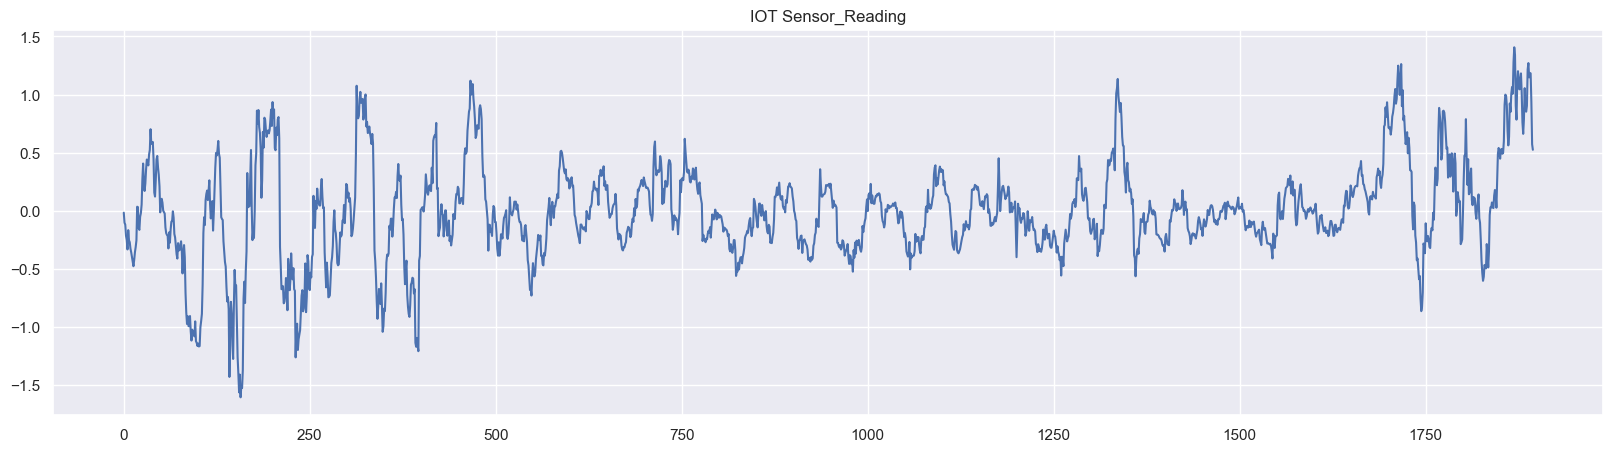

In [88]:
df_comp.IOT_Sensor_Reading.plot(figsize = (20,5), title = "IOT Sensor_Reading")

<AxesSubplot:title={'center':'IOT Error_Present'}>

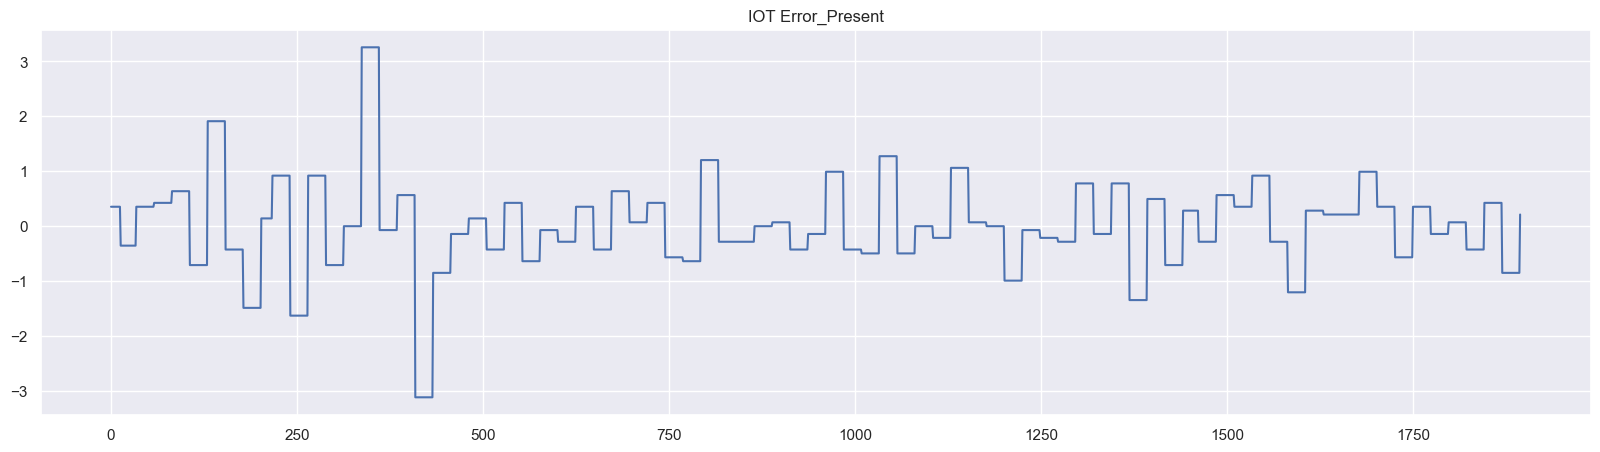

In [89]:
df_comp.Error_Present.plot(figsize = (20,5), title = "IOT Error_Present")

<AxesSubplot:title={'center':'Sensor_2'}>

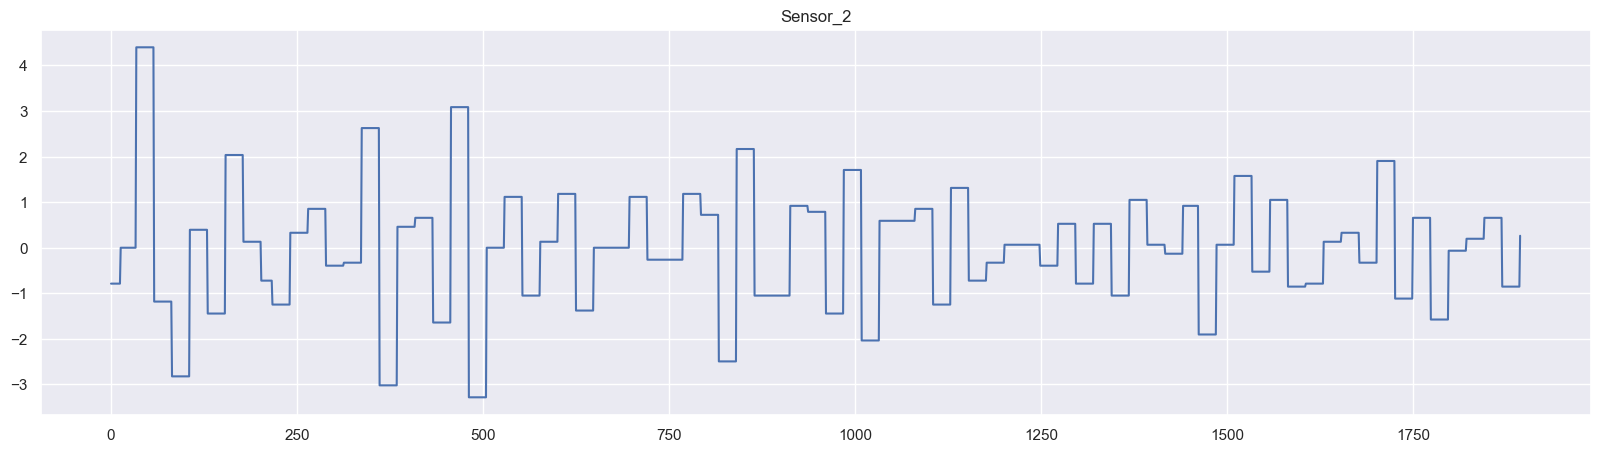

In [90]:
df_comp.Sensor_2.plot(figsize = (20,5), title = "Sensor_2")

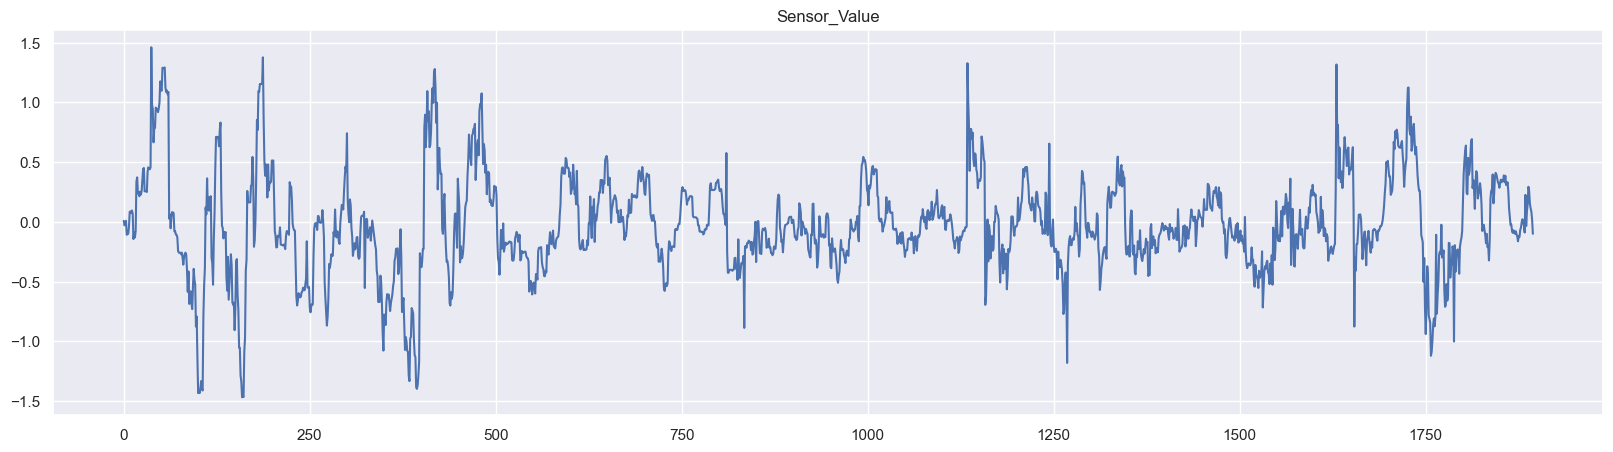

In [91]:
df_comp.Sensor_Value.plot(figsize = (20,5), title = 'Sensor_Value')
plt.show()

TypeError: 'str' object is not callable

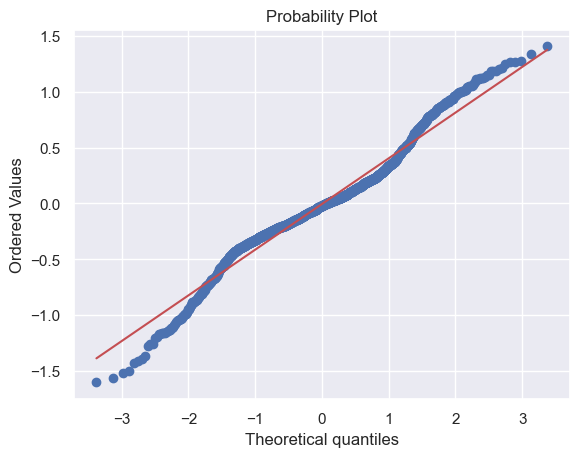

In [92]:
#the QQ plot - A Q-Q plot is a scatterplot created by plotting two sets of quantiles against one another.
scipy.stats.probplot(df_comp.IOT_Sensor_Reading, plot = pylab)
plt.title('QQ plot for IOT_Sensor_Reading')
pylab.show()

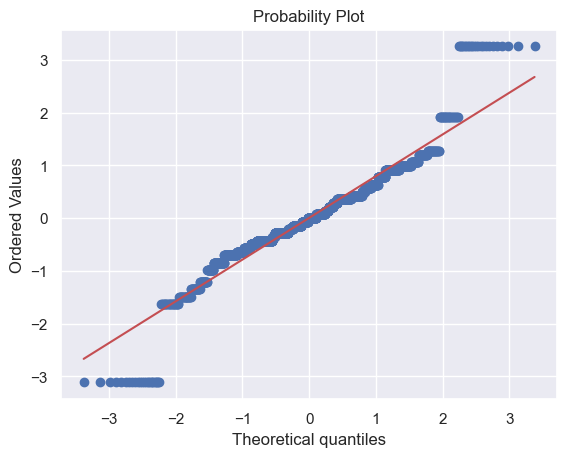

In [101]:
#the QQ plot
scipy.stats.probplot(df_comp.Error_Present, plot = pylab)
plt.title = ("QQ_plot_for_IOT_Error_Present")
pylab.show()

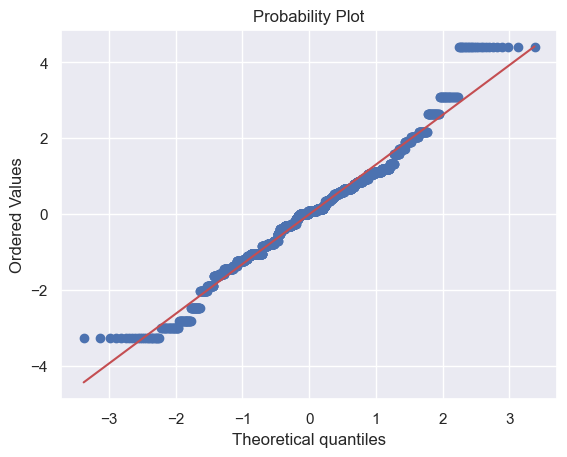

In [96]:
#the QQ plot
scipy.stats.probplot(df_comp.Sensor_2, plot = pylab)
plt.title = ('QQ plot for Sensor_2')
pylab.show()

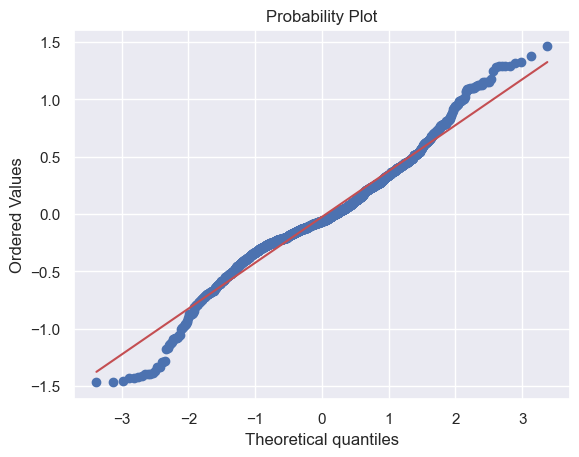

In [97]:
#the QQ plot
scipy.stats.probplot(df_comp.Sensor_Value, plot = pylab)
plt.title = ('QQ plot for Sensor_Value')
pylab.show()

## From Text to Date

In [102]:
# taken as text field
df_comp.time.describe()

count                 1895
unique                1895
top       29-08-2017 11:00
freq                     1
Name: time, dtype: object

In [103]:
df_comp.time = pd.to_datetime(df_comp.time, format = '%d-%m-%Y %H:%M')

In [104]:
df_comp.head()

,time,IOT_Sensor_Reading,Error_Present,Sensor_2,Sensor_Value
0,2017-08-29 11:00:00,-0.015871,0.353986,-0.787655,0.008144
1,2017-08-29 12:00:00,-0.101576,0.353986,-0.787655,-0.029860
2,2017-08-29 13:00:00,-0.118241,0.353986,-0.787655,-0.021717
3,2017-08-29 14:00:00,-0.214262,0.353986,-0.787655,0.008144
4,2017-08-29 15:00:00,-0.249972,0.353986,-0.787655,-0.108583


In [105]:
df_comp.time.describe()

C:\Users\Joseph\AppData\Local\Temp\ipykernel_23080\1400440749.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_comp.time.describe()


count                    1895
unique                   1895
top       2017-08-29 11:00:00
freq                        1
first     2017-08-29 11:00:00
last      2017-11-17 00:00:00
Name: time, dtype: object

In [106]:
# Setting the Index
df_comp.set_index('time',inplace = True)

In [107]:
df_comp

,IOT_Sensor_Reading,Error_Present,Sensor_2,Sensor_Value
time,,,,
2017-08-29 11:00:00,-0.015871,0.353986,-0.787655,0.008144
2017-08-29 12:00:00,-0.101576,0.353986,-0.787655,-0.029860
2017-08-29 13:00:00,-0.118241,0.353986,-0.787655,-0.021717
2017-08-29 14:00:00,-0.214262,0.353986,-0.787655,0.008144
2017-08-29 15:00:00,-0.249972,0.353986,-0.787655,-0.108583
...,...,...,...,...
2017-11-16 20:00:00,1.186376,-0.849566,-0.853293,0.152016
2017-11-16 21:00:00,1.182408,-0.849566,-0.853293,0.114012
2017-11-16 22:00:00,0.934023,-0.849566,-0.853293,0.084152


## Setting the Index

In [108]:
#Time is something that uniquely identifies the role of this progress. That is why time has to be the index
#ensure that the frequency of the time duration is equally spaced
# That is
df_comp.asfreq("H")

,IOT_Sensor_Reading,Error_Present,Sensor_2,Sensor_Value
time,,,,
2017-08-29 11:00:00,-0.015871,0.353986,-0.787655,0.008144
2017-08-29 12:00:00,-0.101576,0.353986,-0.787655,-0.029860
2017-08-29 13:00:00,-0.118241,0.353986,-0.787655,-0.021717
2017-08-29 14:00:00,-0.214262,0.353986,-0.787655,0.008144
2017-08-29 15:00:00,-0.249972,0.353986,-0.787655,-0.108583
...,...,...,...,...
2017-11-16 20:00:00,1.186376,-0.849566,-0.853293,0.152016
2017-11-16 21:00:00,1.182408,-0.849566,-0.853293,0.114012
2017-11-16 22:00:00,0.934023,-0.849566,-0.853293,0.084152


In [109]:
df_comp = df_comp.asfreq('H')

## Reduce the Missing Values

In [110]:
df_comp.isna().sum()

IOT_Sensor_Reading    15
Error_Present         15
Sensor_2              15
Sensor_Value          15
dtype: int64

In [111]:
#forward fill missing values
df_comp.IOT_Sensor_Reading = df_comp.IOT_Sensor_Reading.fillna(method = 'ffill')

In [112]:
#backwardfill missing values
df_comp.Error_Present = df_comp.Error_Present.fillna(method = 'bfill')

In [113]:
#backward fill missing values
df_comp.Sensor_2 = df_comp.Sensor_2.fillna(method = 'bfill')

In [114]:
#mean fill missing values
df_comp.Sensor_Value = df_comp.Sensor_Value.fillna(value = df_comp.Sensor_Value.mean())

In [115]:
#again check for missing values
df_comp.isna().sum()

IOT_Sensor_Reading    0
Error_Present         0
Sensor_2              0
Sensor_Value          0
dtype: int64

## Simplifying the DataSet

In [116]:
df_comp["IOT_Reading"] = df_comp.IOT_Sensor_Reading

In [117]:
df_comp.describe()

,IOT_Sensor_Reading,Error_Present,Sensor_2,Sensor_Value,IOT_Reading
count,1910.000000,1910.000000,1910.000000,1910.000000,1910.000000
mean,-0.003482,0.004300,-0.013471,-0.026563,-0.003482
std,0.416235,0.817652,1.320546,0.403473,0.416235
min,-1.603790,-3.115077,-3.281895,-1.468581,-1.603790
25%,-0.222198,-0.424783,-0.853293,-0.230738,-0.222198
50%,-0.020236,0.000000,0.065638,-0.061078,-0.020236
75%,0.191844,0.424783,0.787655,0.206307,0.191844
max,1.406987,3.256671,4.397739,1.460437,1.406987


In [118]:
del df_comp['Error_Present']
del df_comp['Sensor_2']
del df_comp['Sensor_Value']

In [119]:
df_comp.describe()

,IOT_Sensor_Reading,IOT_Reading
count,1910.000000,1910.000000
mean,-0.003482,-0.003482
std,0.416235,0.416235
min,-1.603790,-1.603790
25%,-0.222198,-0.222198
50%,-0.020236,-0.020236
75%,0.191844,0.191844
max,1.406987,1.406987


## White Noise

In [120]:
wn = np.random.normal(loc = df_comp.IOT_Reading.mean(), scale = df_comp.IOT_Reading.std(), size = len(df_comp))

In [121]:
df_comp['wn'] = wn
df_comp.describe()

,IOT_Sensor_Reading,IOT_Reading,wn
count,1910.000000,1910.000000,1910.000000
mean,-0.003482,-0.003482,-0.014205
std,0.416235,0.416235,0.410332
min,-1.603790,-1.603790,-1.236559
25%,-0.222198,-0.222198,-0.301062
50%,-0.020236,-0.020236,-0.025189
75%,0.191844,0.191844,0.265908
max,1.406987,1.406987,1.220726


TypeError: 'str' object is not callable

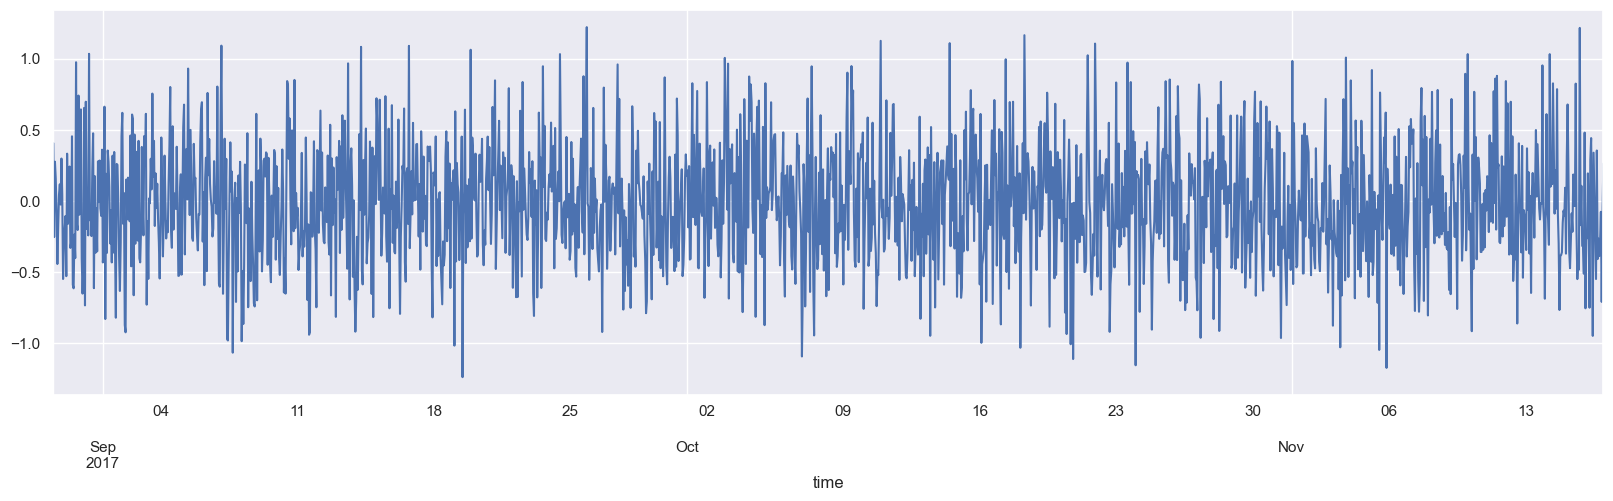

In [122]:
#plot white noise
df_comp.wn.plot(figsize=(20,5))
plt.title('White Noise Time-Series', size=24)
plt.show

In [ ]:
#plot IOT Reading 
df_comp.IOT_Reading.plot(figsize=(20,5))
plt.title('IOT_Reading Series', size=24)
plt.show

In [ ]:
#Check the mean is zero, and the variance to see if IOT_Reading is White Noise
df_comp.wn.plot(figsize=(20,5))
df_comp.IOT_Reading.plot(figsize=(20,5))
plt.title('White Noise Time-Series', size=24)
plt.show

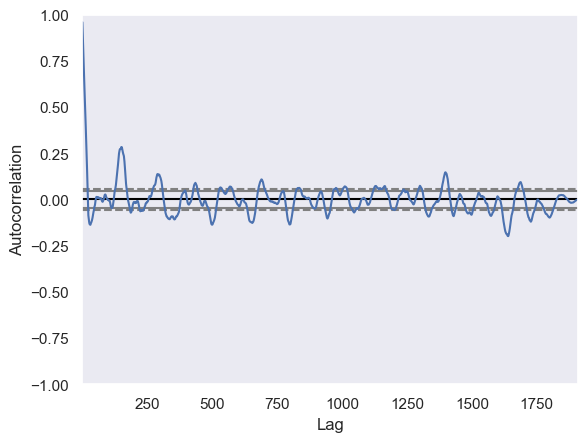

In [123]:
#check the autocorrelation
autocorrelation_plot(df_comp.IOT_Reading)
plt.show()

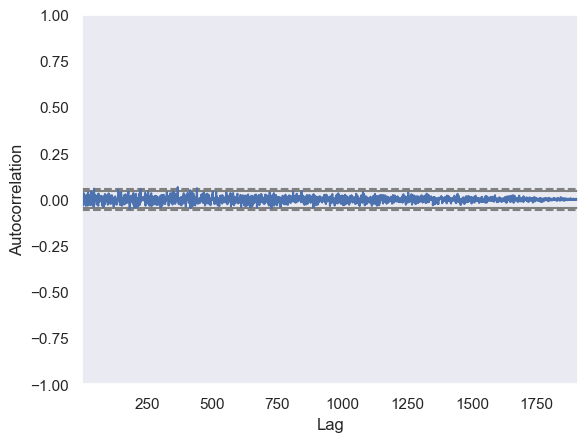

In [124]:
#check the autocorrelation
autocorrelation_plot(df_comp.wn)
plt.show()

## Random Walk

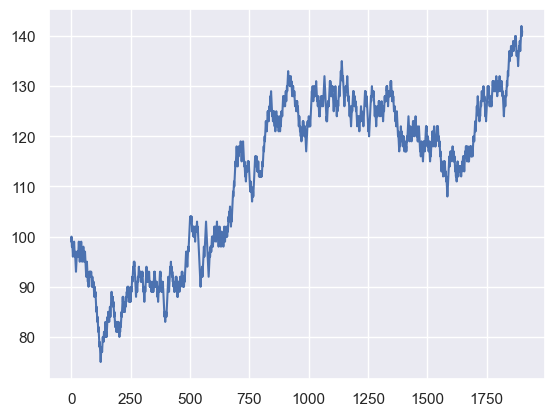

In [125]:
walk = [99]

for i in range(1900):
    #Create random noise
    noise = -1 if np.random.random() < 0.5 else 1
    walk.append(walk[-1] + noise)
    
plt.plot(walk)

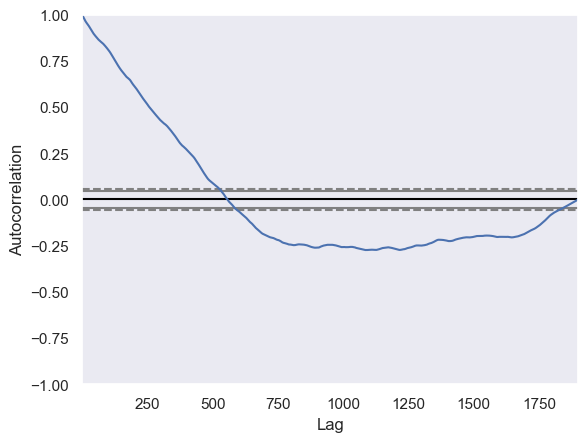

In [126]:
#check the autocorrelation
autocorrelation_plot(walk)
plt.show()

## Stationary

#### AD Fuller Test

In [127]:
#Augmented Dickey-Fuller test is a type of statistical test called a unit root test to determine how strongly a time series is defined by trend
#null hypothesis of the test is that the time series can be represented by a unit root that is not stationary
#alternate hypothesis (rejecting the null hypothsis) is that the time series is stationary

sts.adfuller(df_comp.wn)

(-43.348878523774,
 0.0,
 0,
 1909,
 {'1%': -3.4337801282776335,
  '5%': -2.8630552063395585,
  '10%': -2.5675766377428086},
 2002.794104739668)

In [128]:
sts.adfuller(df_comp.IOT_Reading)

(-6.110712566123988,
 9.347651207123736e-08,
 25,
 1884,
 {'1%': -3.433825707083533,
  '5%': -2.8630753283581076,
  '10%': -2.567587351898432},
 -3174.2594240489434)

In [129]:
sts.adfuller(walk)

(-0.8755839337611302,
 0.7959066165935818,
 0,
 1900,
 {'1%': -3.4337963982844437,
  '5%': -2.8630623892170872,
  '10%': -2.5675804623268697},
 5320.308518799577)

#### KPSS Test

In [130]:
sts.kpss(df_comp.IOT_Reading, regression = 'c')

(0.704705322948274,
 0.013117697913793268,
 26,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

#### Seasonality

<function matplotlib.pyplot.show(close=None, block=None)>

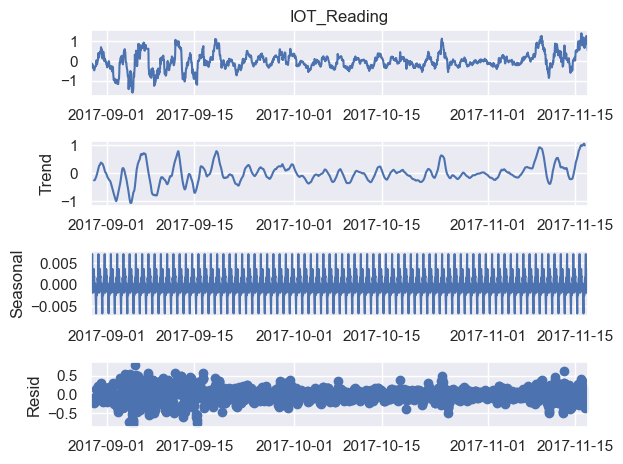

In [131]:
# Naive Decomposition
#Observed = Trend + Seasonal + Residual
additive = seasonal_decompose(df_comp.IOT_Reading, model='additive')
additive.plot()
plt.show

#### AutoCorrelation Function (ACF)

TypeError: 'str' object is not callable

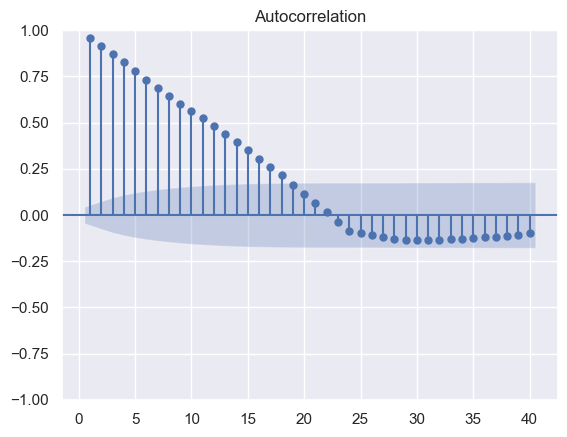

In [132]:
sgt.plot_acf(df_comp.IOT_Reading, lags=40, zero=False)
plt.title('ACF IOT Reading')
plt.show()

In [ ]:
sgt.plot_acf(df_comp.wn, lags=40, zero=False)
plt.title('ACF White Noise')
plt.show()

### PACF

TypeError: 'str' object is not callable

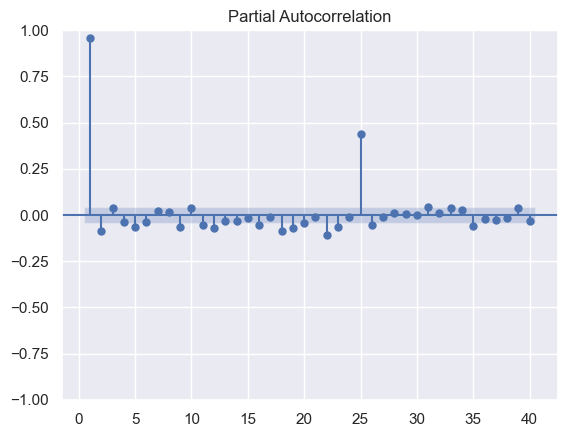

In [133]:
sgt.plot_pacf(df_comp.IOT_Reading, lags=40, zero=False, method=('ols'))
plt.title("PACF IOT Reading")
plt.show()

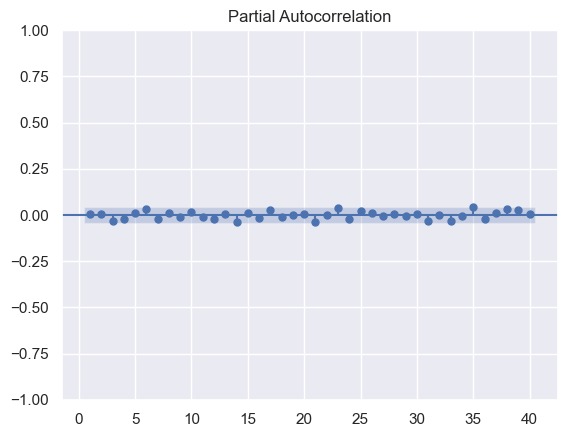

In [134]:
sgt.plot_pacf(df_comp.wn, lags=40, zero=False, method=('ols'))
plt.title = ("PACF White Noise")
plt.show()

## Autoregressor AR

In [151]:
#AR1
model_ar = sm.tsa.arima.ARIMA(df_comp.IOT_Reading, order=(1,0,0))
result_ar = model_ar.fit()
result_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            IOT_Reading   No. Observations:                 1910
Model:                 ARIMA(1, 0, 0)   Log Likelihood                1376.095
Date:                Wed, 09 Nov 2022   AIC                          -2746.190
Time:                        11:13:45   BIC                          -2729.525
Sample:                    08-29-2017   HQIC                         -2740.057
                         - 11-17-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0030      0.067      0.045      0.964      -0.128       0.134
ar.L1          0.9596      0.005    204.299      0.000       0.950       0.969
sigma2         0.0138      0.000     61.448      0.000       0.013       0.014
===================================================================================
Ljung-Box (L1) (Q):                  13.96   Jarque-Bera (JB):              3137.37
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.50   Skew:                            -0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [152]:
#AR2
model_ar2 = sm.tsa.arima.ARIMA(df_comp.IOT_Reading, order=(2,0,0))
result_ar2 = model_ar2.fit()
result_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            IOT_Reading   No. Observations:                 1910
Model:                 ARIMA(2, 0, 0)   Log Likelihood                1383.690
Date:                Wed, 09 Nov 2022   AIC                          -2759.380
Time:                        11:14:45   BIC                          -2737.160
Sample:                    08-29-2017   HQIC                         -2751.202
                         - 11-17-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0019      0.061      0.032      0.975      -0.118       0.122
ar.L1          1.0448      0.017     63.185      0.000       1.012       1.077
ar.L2         -0.0889      0.017     -5.298      0.000      -0.122      -0.056
sigma2         0.0137      0.000     60.618      0.000       0.013       0.014
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              3050.28
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.50   Skew:                            -0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [153]:
#AR1
model_ar3 = sm.tsa.arima.ARIMA(df_comp.IOT_Reading, order=(3,0,0))
result_ar3 = model_ar3.fit()
result_ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            IOT_Reading   No. Observations:                 1910
Model:                 ARIMA(3, 0, 0)   Log Likelihood                1385.169
Date:                Wed, 09 Nov 2022   AIC                          -2760.337
Time:                        11:15:06   BIC                          -2732.563
Sample:                    08-29-2017   HQIC                         -2750.115
                         - 11-17-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0021      0.063      0.034      0.973      -0.121       0.126
ar.L1          1.0480      0.017     62.618      0.000       1.015       1.081
ar.L2         -0.1302      0.024     -5.350      0.000      -0.178      -0.082
ar.L3          0.0394      0.016      2.495      0.013       0.008       0.070
sigma2         0.0137      0.000     60.596      0.000       0.013       0.014
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              3124.11
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                            -0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [154]:
#AR4
model_ar4 = sm.tsa.arima.ARIMA(df_comp.IOT_Reading, order=(1,0,0))
result_ar4 = model_ar4.fit()
result_ar4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            IOT_Reading   No. Observations:                 1910
Model:                 ARIMA(1, 0, 0)   Log Likelihood                1376.095
Date:                Wed, 09 Nov 2022   AIC                          -2746.190
Time:                        11:16:15   BIC                          -2729.525
Sample:                    08-29-2017   HQIC                         -2740.057
                         - 11-17-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0030      0.067      0.045      0.964      -0.128       0.134
ar.L1          0.9596      0.005    204.299      0.000       0.950       0.969
sigma2         0.0138      0.000     61.448      0.000       0.013       0.014
===================================================================================
Ljung-Box (L1) (Q):                  13.96   Jarque-Bera (JB):              3137.37
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.50   Skew:                            -0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Log Likelyhood Test

In [156]:
def LLR_test(model_1, model_2, DF=1):
    L1 = model_1.fit().llf
    L2 = model_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [157]:
#with a p test less than .05 is valid and AR(1) shows stationartiry.
LLR_test(model_ar, model_ar2)

0.0

In [159]:
LLR_test(model_ar2, model_ar3)

0.085

In [160]:
LLR_test(model_ar3, model_ar4)

1.0

In [161]:
df_comp['rolling_mean_IOT_Reading'] = df_comp['IOT_Reading'].rolling(window = 24).mean() 
df_comp.tail()

,IOT_Sensor_Reading,IOT_Reading,wn,rolling_mean_IOT_Reading
time,,,,
2017-11-16 20:00:00,1.186376,1.186376,-0.289802,1.051537
2017-11-16 21:00:00,1.182408,1.182408,-0.075890,1.058811
2017-11-16 22:00:00,0.934023,0.934023,-0.708144,1.044494
2017-11-16 23:00:00,0.572952,0.572952,-0.112324,1.009742
2017-11-17 00:00:00,0.525338,0.525338,0.262684,0.975718


In [162]:
df_comp['rolling_mean_IOT_Reading'] = df_comp['IOT_Reading'].rolling(window = 24).std() 
df_comp.tail()

,IOT_Sensor_Reading,IOT_Reading,wn,rolling_mean_IOT_Reading
time,,,,
2017-11-16 20:00:00,1.186376,1.186376,-0.289802,0.199033
2017-11-16 21:00:00,1.182408,1.182408,-0.075890,0.200550
2017-11-16 22:00:00,0.934023,0.934023,-0.708144,0.196473
2017-11-16 23:00:00,0.572952,0.572952,-0.112324,0.203214
2017-11-17 00:00:00,0.525338,0.525338,0.262684,0.213290


In [163]:
#Expanding Window
df_comp['rolling_mean_IOT_Reading'] = df_comp['IOT_Reading'].expanding(min_periods=1).mean() 
df_comp.rolling_mean_IOT_Reading

time
2017-08-29 11:00:00   -0.015871
2017-08-29 12:00:00   -0.058724
2017-08-29 13:00:00   -0.078563
2017-08-29 14:00:00   -0.112488
2017-08-29 15:00:00   -0.139984
                         ...   
2017-11-16 20:00:00   -0.005176
2017-11-16 21:00:00   -0.004553
2017-11-16 22:00:00   -0.004061
2017-11-16 23:00:00   -0.003759
2017-11-17 00:00:00   -0.003482
Freq: H, Name: rolling_mean_IOT_Reading, Length: 1910, dtype: float64

In [164]:
df_comp['rolling_mean_IOT_Reading'] = df_comp['IOT_Reading'].expanding(min_periods=1).std() 
df_comp.rolling_mean_IOT_Reading

time
2017-08-29 11:00:00         NaN
2017-08-29 12:00:00    0.060602
2017-08-29 13:00:00    0.054928
2017-08-29 14:00:00    0.081332
2017-08-29 15:00:00    0.093497
                         ...   
2017-11-16 20:00:00    0.414839
2017-11-16 21:00:00    0.415621
2017-11-16 22:00:00    0.416067
2017-11-16 23:00:00    0.416168
2017-11-17 00:00:00    0.416235
Freq: H, Name: rolling_mean_IOT_Reading, Length: 1910, dtype: float64